## 1. Data Understanding and Exploration

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
dataset = pd.read_csv("boombikes.csv")

In [3]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
dataset.shape

(730, 16)

In [5]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Assigning string values to different seasons instead of numeric values

# 1 - Spring
dataset.loc[(dataset['season'] == 1), 'season'] = 'spring'
# 2 - Summer
dataset.loc[(dataset['season'] == 2), 'season'] = 'summer'
# 3 - fall
dataset.loc[(dataset['season'] == 3), 'season'] = 'fall'
# 4 - winter
dataset.loc[(dataset['season'] == 4), 'season'] = 'winter'

In [9]:
dataset['season'].astype('category').value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [10]:
# 0 = 2018, 1 = 2019 : Year
dataset['yr'].astype('category').value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [11]:
# Assigning string values to different months instead of numeric values
def object_map_months(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [12]:
dataset[['mnth']] = dataset[['mnth']].apply(object_map_months)

In [13]:
dataset['mnth'].astype('category').value_counts()

mnth
Aug    62
Dec    62
Jul    62
Jan    62
Oct    62
May    62
Mar    62
Apr    60
Nov    60
Jun    60
Sep    60
Feb    56
Name: count, dtype: int64

In [14]:
dataset['holiday'].astype('category').value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [15]:
def str_map_weekday(x):
    return x.map({1: 'Mon', 2: 'Tues', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat', 0: 'Sun'})

In [16]:
dataset[['weekday']] = dataset[['weekday']].apply(str_map_weekday)

In [17]:
dataset['weekday'].astype('category').value_counts()

weekday
Mon      105
Tues     105
Fri      104
Sat      104
Sun      104
Thurs    104
Wed      104
Name: count, dtype: int64

In [18]:
dataset['workingday'].astype('category').value_counts()

workingday
1    504
0    226
Name: count, dtype: int64

In [19]:
# 1 = Clear, few clouds, Partly cloudy
dataset.loc[(dataset['weathersit'] == 1), 'weathersit'] = 'A'
# 2 = Mist, Cloudy
dataset.loc[(dataset['weathersit'] == 2), 'weathersit'] = 'B'
# 3 = Light Snow, Heavy Rain
dataset.loc[(dataset['weathersit'] == 3), 'weathersit'] = 'C'

In [20]:
dataset['weathersit'].astype('category').value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

## 2. Data Visualisation

In [21]:
# Importing libs
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='temp', ylabel='Density'>

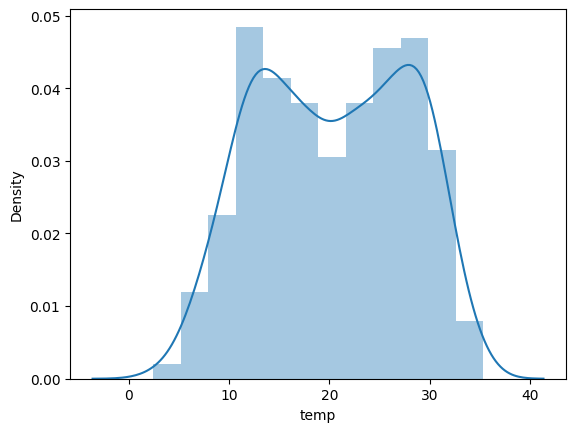

In [22]:
# Temperature 
sns.distplot(dataset['temp'])

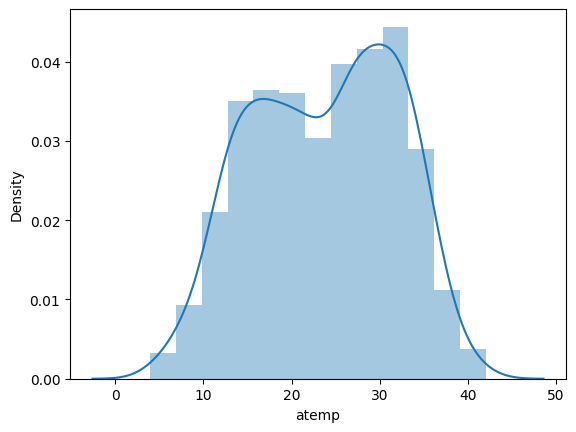

In [23]:
# Actual Temperature 
sns.distplot(dataset['atemp'])
plt.show()

<Axes: xlabel='windspeed', ylabel='Density'>

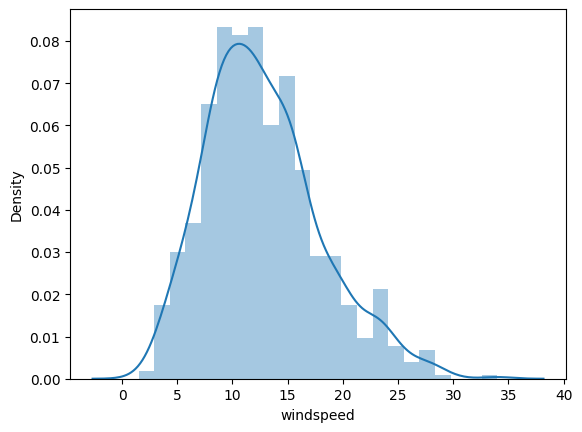

In [24]:
# wind speed
sns.distplot(dataset['windspeed'])

<Axes: xlabel='cnt', ylabel='Density'>

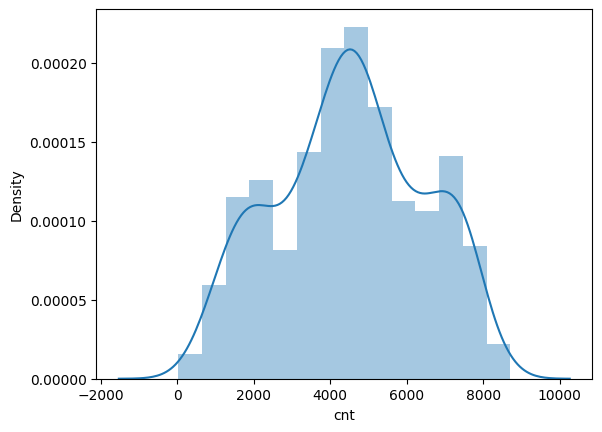

In [25]:
# Target variable: count of total rental bikes including both casual and registered
sns.distplot(dataset['cnt'])

In [26]:
# Converting date to datetime format
dataset['dteday'] = dataset['dteday'].astype('datetime64[ns]')

In [27]:
dataset_categorical = dataset.select_dtypes(exclude=['float64', 'datetime64[ns]', 'int64'])

In [28]:
dataset_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [29]:
dataset_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tues,B
2,spring,Jan,Wed,A
3,spring,Jan,Thurs,A
4,spring,Jan,Fri,A
...,...,...,...,...
725,spring,Dec,Fri,B
726,spring,Dec,Sat,B
727,spring,Dec,Sun,B
728,spring,Dec,Mon,A


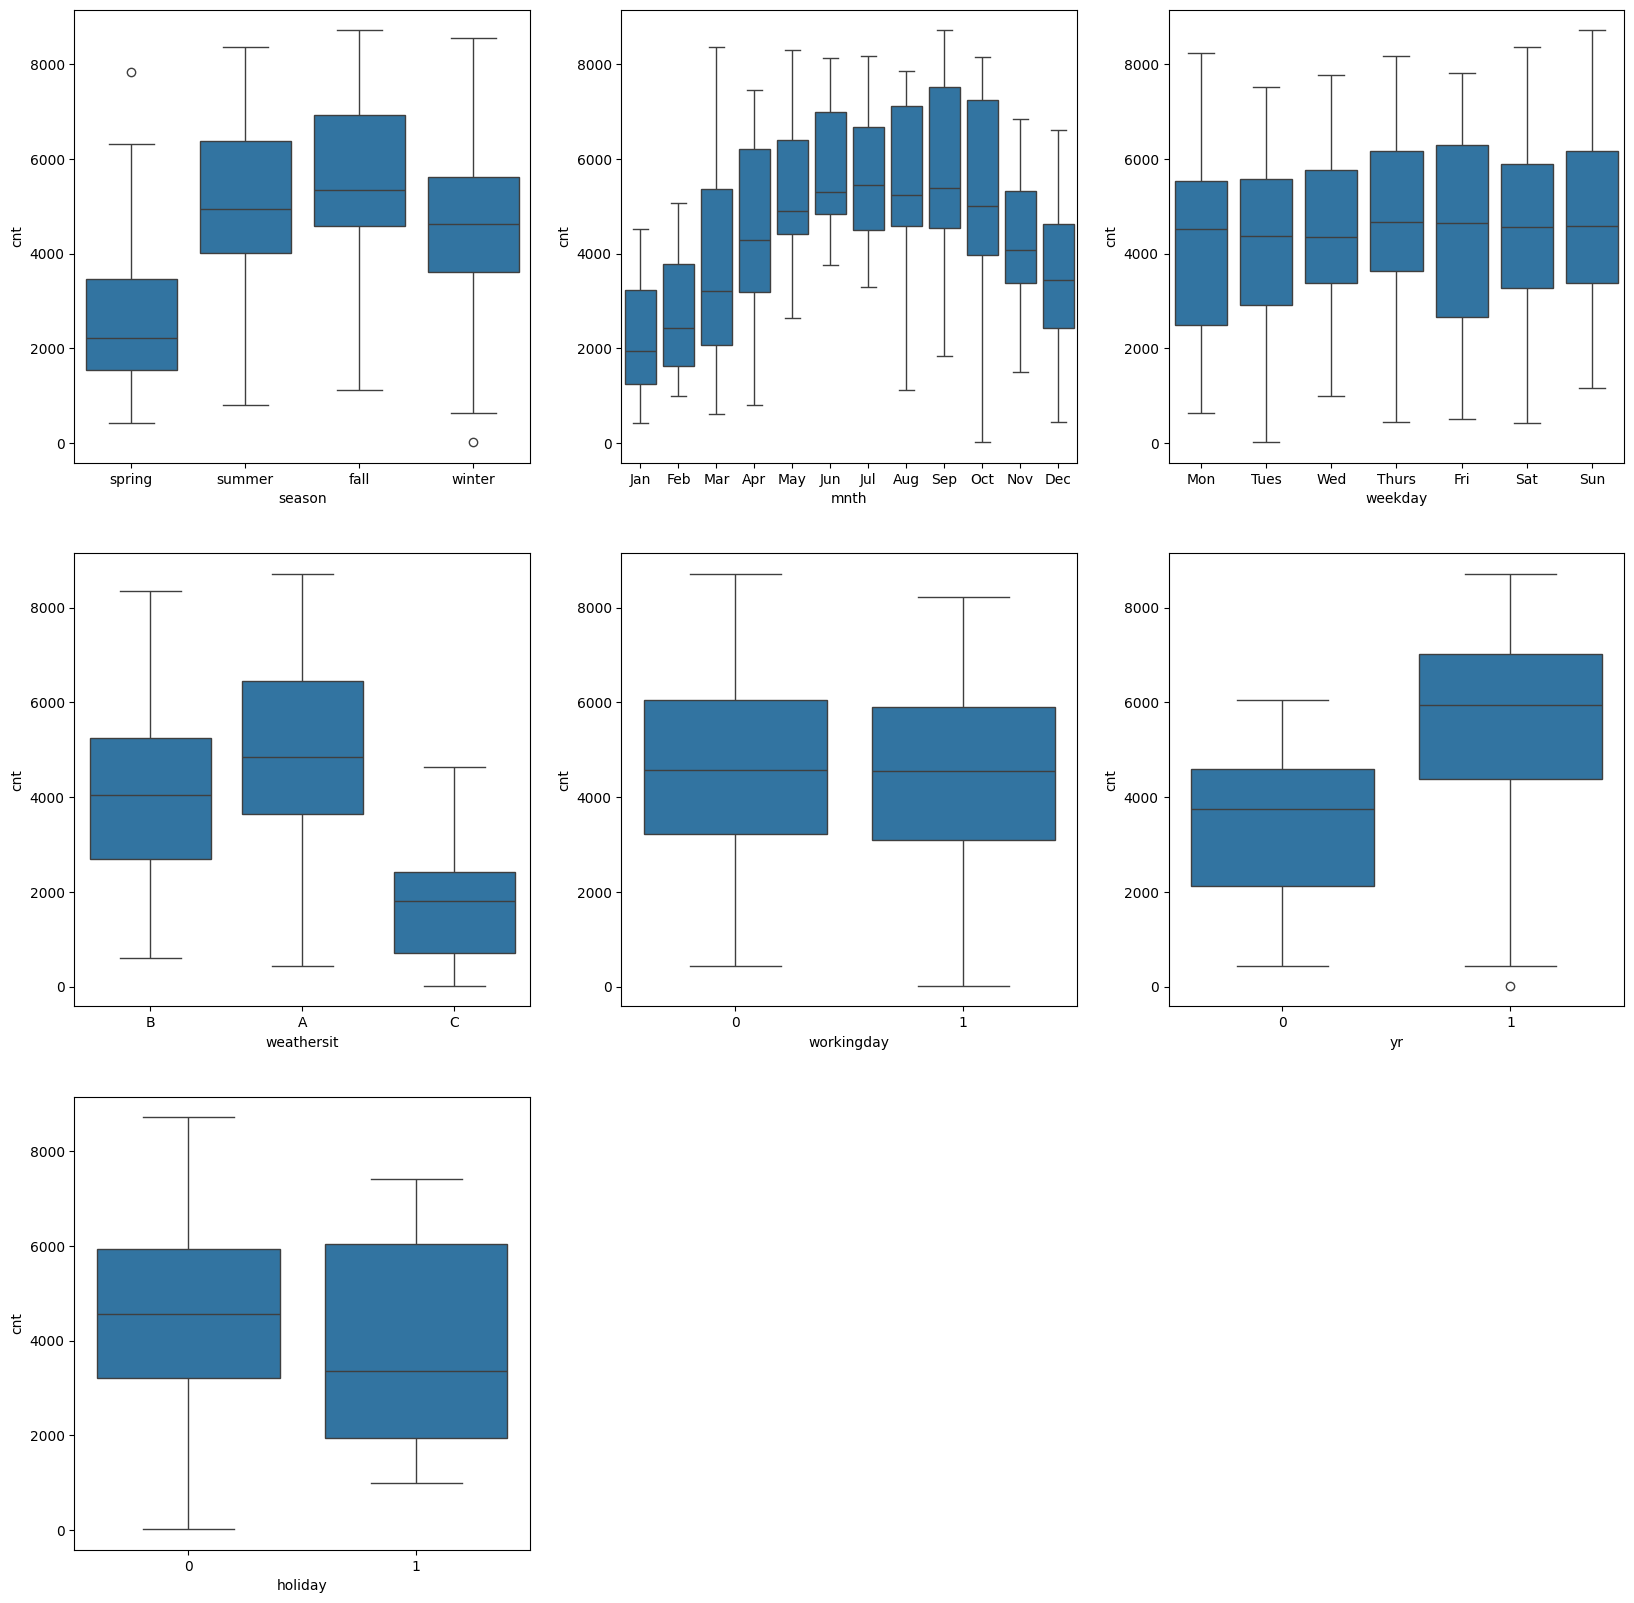

In [30]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data=dataset)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data=dataset)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data=dataset)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data=dataset)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data=dataset)
plt.subplot(3,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data=dataset)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data=dataset)
plt.show()

In [31]:
intVarlist = ["casual", "registered", "cnt"]

for var in intVarlist:
    dataset[var] = dataset[var].astype("float")

In [32]:
dataset_numeric = dataset.select_dtypes(include=['float64'])
dataset_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


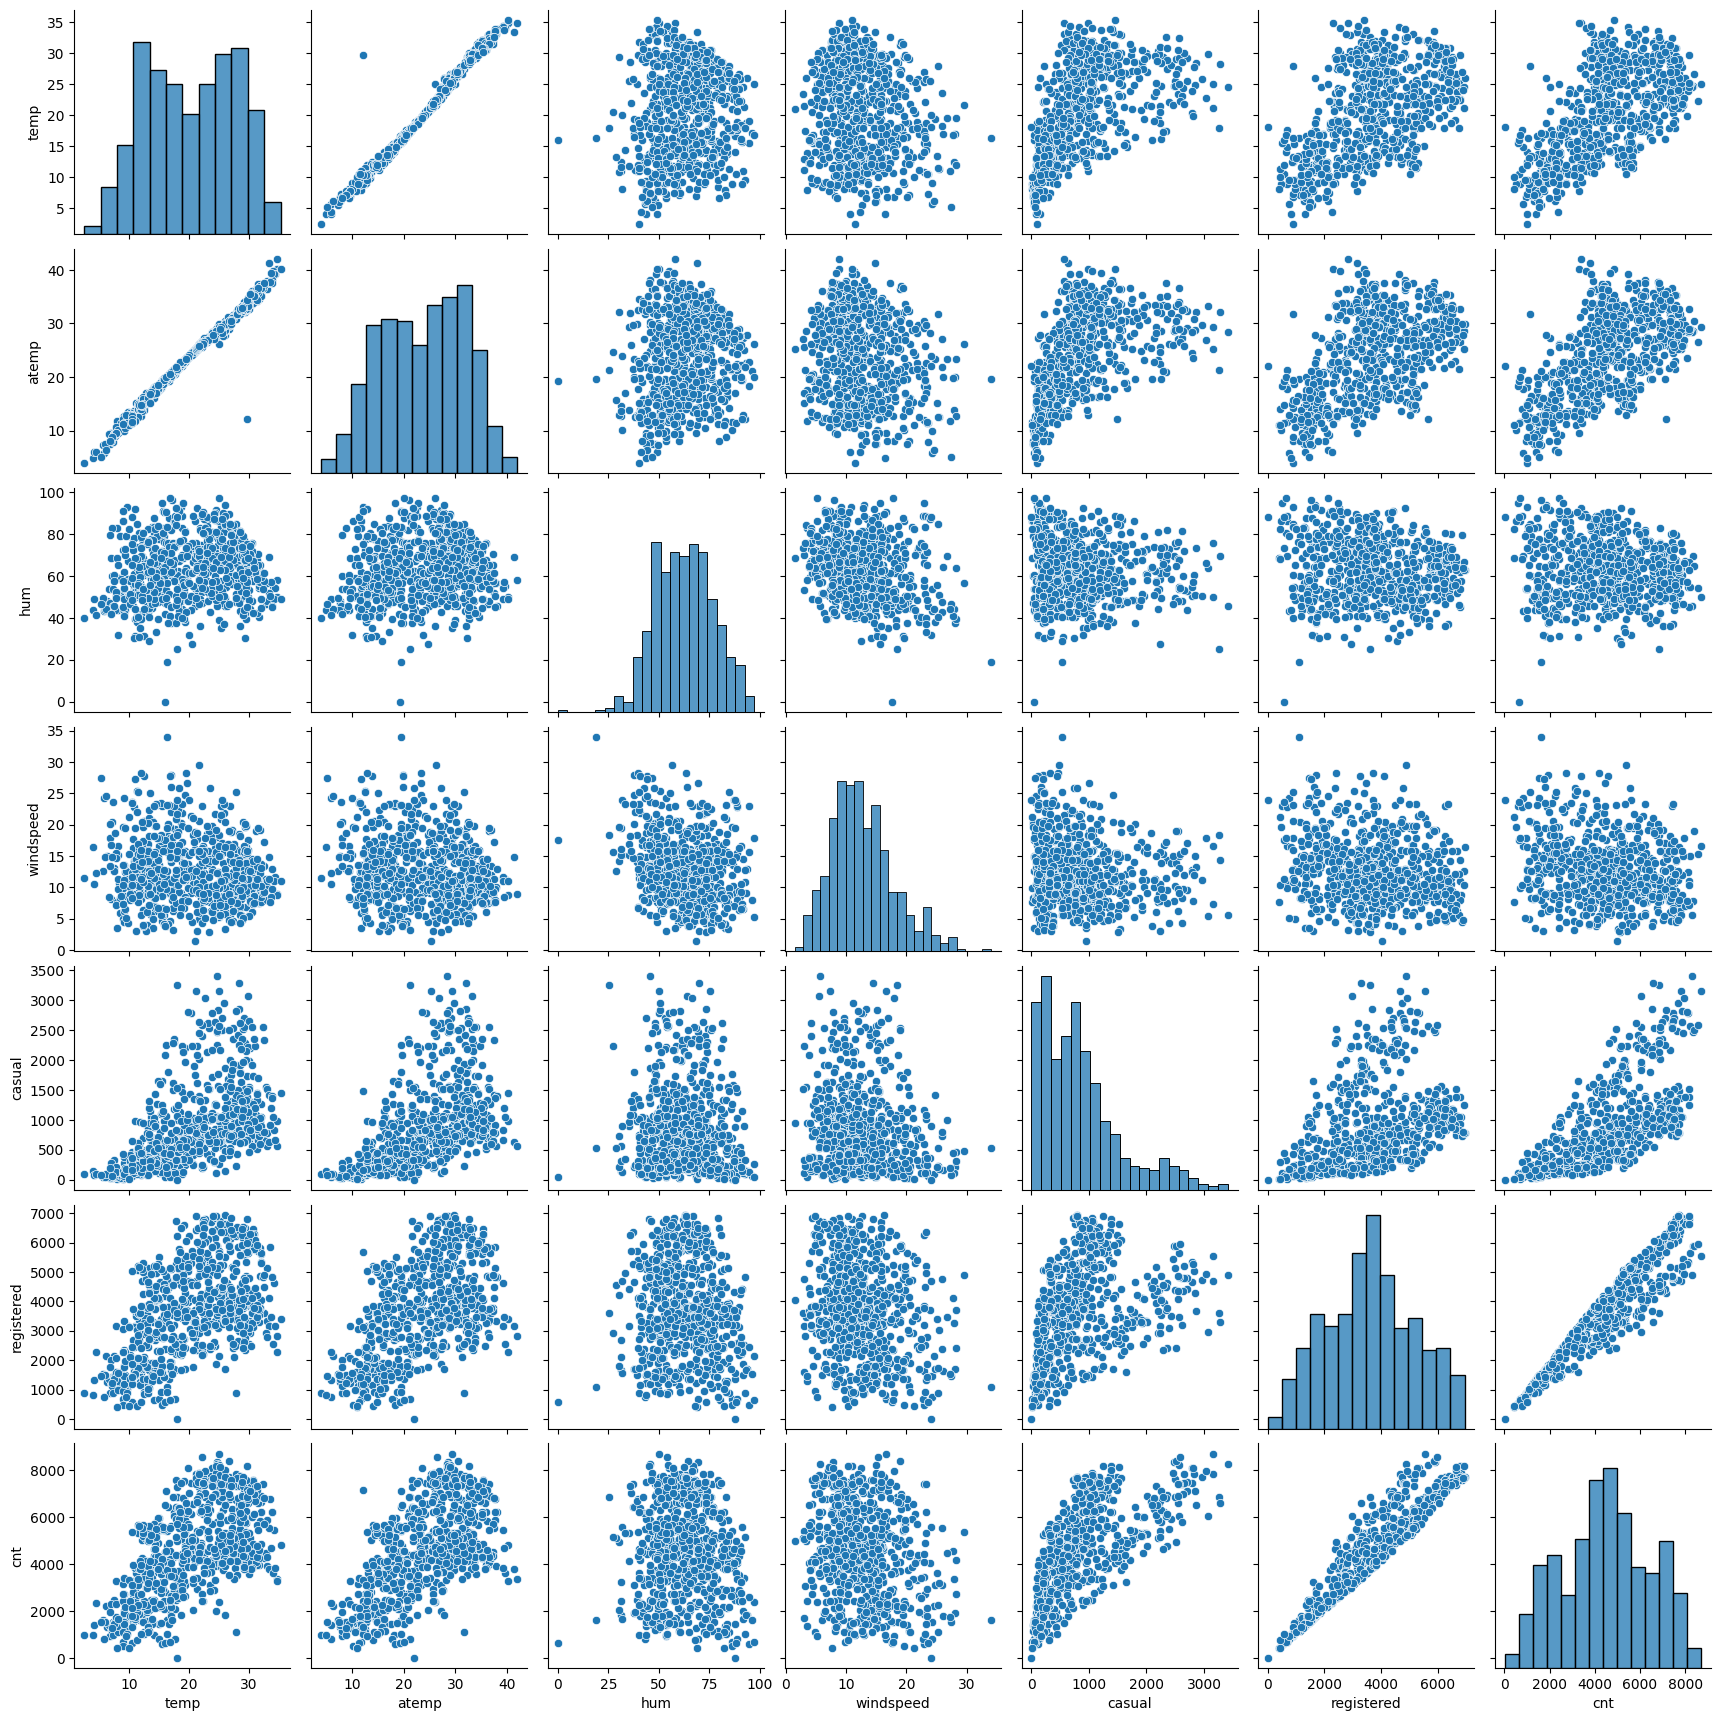

In [33]:
sns.pairplot(dataset_numeric)
plt.show()

In [34]:
cor = dataset_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


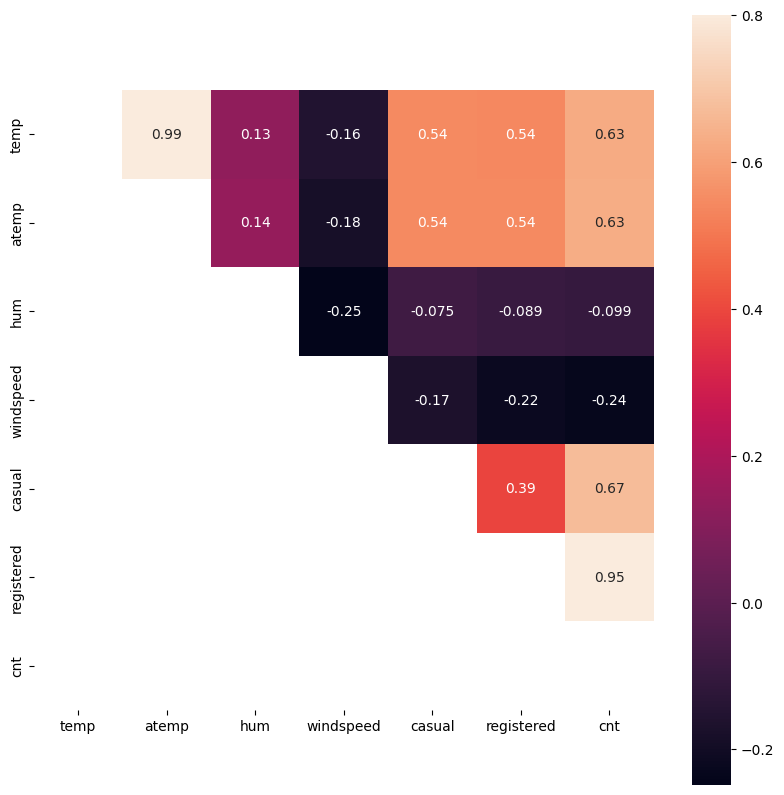

In [35]:
# heatmap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure cor is a float matrix (correlation matrices are always float)
cor = cor.astype(float)

# Create a boolean mask for the upper triangle
mask = np.tril(np.ones_like(cor, dtype=bool))

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(cor, mask=mask, vmax=0.8, square=True, annot=True)
plt.show()


In [36]:
# Removing atemp as it is highly correlated with temp
dataset.drop('atemp', axis=1, inplace=True)

In [37]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,1,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,Jan,0,Tues,1,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,Jan,0,Wed,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,Jan,0,Thurs,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,Jan,0,Fri,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


## 3. Data Preparation

In [38]:
dataset_categorical = dataset.select_dtypes(include=['object'])

In [39]:
dataset_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,Tues,B
2,spring,Jan,Wed,A
3,spring,Jan,Thurs,A
4,spring,Jan,Fri,A


In [40]:
dataset_dummies = pd.get_dummies(dataset_categorical, drop_first = True)
dataset_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
# Identify all boolean columns in your dataset
bool_cols = dataset_dummies.select_dtypes(include='bool').columns

# Convert all boolean columns to integers (1/0)
dataset_dummies[bool_cols] = dataset_dummies[bool_cols].astype(int)
#dataset_dummies = dataset_dummies.head(5)
dataset_dummies

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [42]:
# Drop Categorical variable columns
dataset = dataset.drop(list(dataset_categorical.columns), axis = 1)
dataset

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,1,0,0,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,1,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [43]:
# Concatenate dummy variables with the dataset
dataset = pd.concat([dataset, dataset_dummies], axis = 1, join='inner')

In [44]:
dataset.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-02-01,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
dataset = dataset.drop(['instant', 'dteday'], axis=1, inplace=False)
dataset.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,0,0,0


## 4. Model Building and Evaluation

In [46]:
# Import libs
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [47]:
# Split the dataframe into training and test datasets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 100)

In [48]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,...,0,0,0,0,0,0,1,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,...,0,0,0,0,0,0,0,0,0,0
350,0,0,1,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,...,0,0,1,0,0,0,0,0,1,0


In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [51]:
# Apply scalar to all columns except dummy variables
var = ["temp", "hum", "windspeed", "casual", "registered", "cnt"]

df_train[var] = scaler.fit_transform(df_train[var])

In [52]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


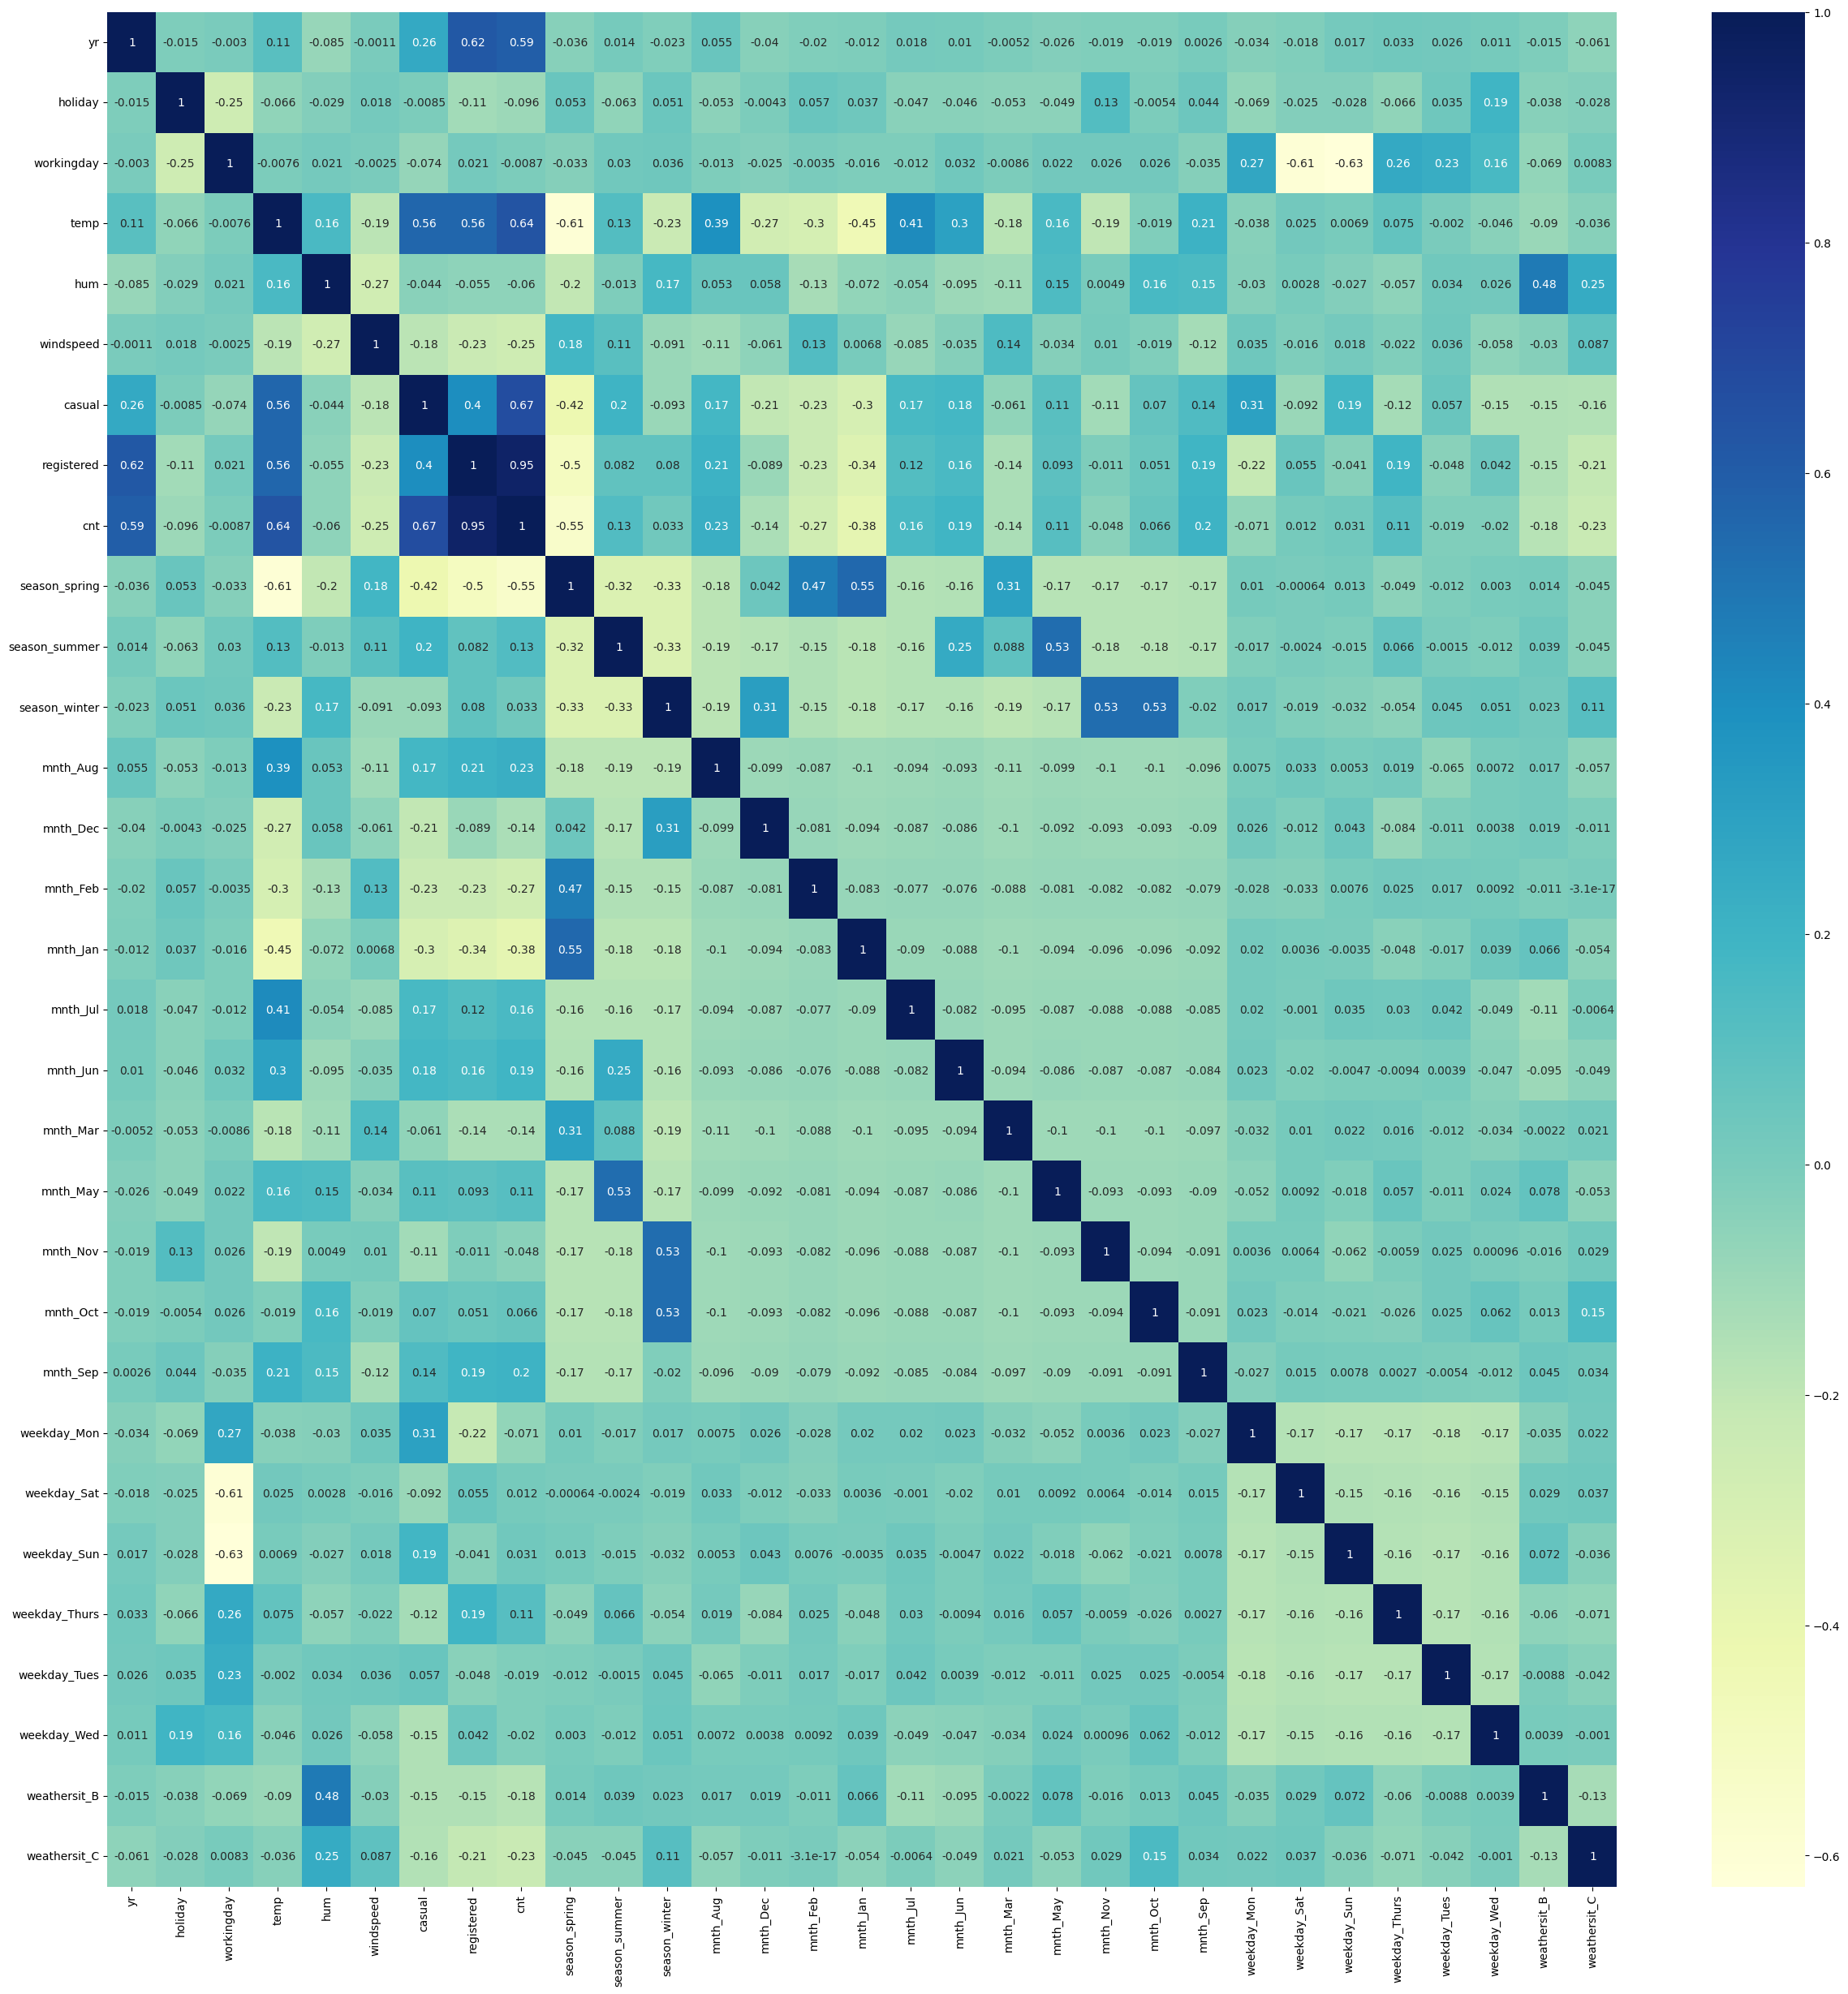

In [53]:
# Checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [54]:
# Dividing into x and y
x_train = df_train.drop(["casual", "registered"], axis=1)
y_train = df_train['cnt']

In [55]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [56]:
#np.array(x_train)

In [57]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_lm).fit()

In [58]:
lr.params

const           -4.683753e-16
yr              -1.175275e-16
holiday          9.475927e-17
workingday       1.044304e-15
temp            -1.162265e-16
hum              4.588344e-16
windspeed        3.157197e-16
cnt              1.000000e+00
season_spring   -5.898060e-17
season_summer   -4.244652e-17
season_winter    3.364279e-16
mnth_Aug        -1.685934e-16
mnth_Dec        -1.040834e-16
mnth_Feb        -1.804112e-16
mnth_Jan         1.353084e-16
mnth_Jul         1.760744e-16
mnth_Jun         3.207070e-16
mnth_Mar         4.857226e-17
mnth_May         9.692767e-17
mnth_Nov        -3.252607e-16
mnth_Oct        -5.616167e-16
mnth_Sep         2.131541e-16
weekday_Mon      2.255141e-17
weekday_Sat      8.174884e-16
weekday_Sun      4.112921e-16
weekday_Thurs    4.770490e-17
weekday_Tues     1.971622e-16
weekday_Wed      1.561251e-17
weathersit_B     4.996004e-16
weathersit_C     5.492568e-16
dtype: float64

In [59]:
lm = LinearRegression()

lm.fit(x_train, y_train)

LinearRegression()

In [60]:
print(lm.coef_)
print(lm.intercept_)

[ 9.83351026e-18  5.55111512e-16  2.53626462e-17 -1.18830134e-16
  3.05355153e-16  1.32743870e-16  1.00000000e+00  1.69640376e-16
  2.64114525e-16  1.90518390e-16 -5.92674172e-17  5.76772283e-17
 -1.24162956e-16  8.31733843e-17 -1.91667580e-16  2.80082706e-16
  1.60364093e-16  2.42861287e-16  3.46944695e-17  4.85722573e-17
  1.38777878e-17  4.16333634e-17  7.63278329e-17 -1.17961196e-16
 -8.32667268e-17 -3.46944695e-17 -4.51028104e-17  6.93889390e-18
  5.55111512e-17]
-3.3306690738754696e-16


In [61]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.181e+29
Date:                Tue, 01 Jul 2025   Prob (F-statistic):               0.00
Time:                        14:08:17   Log-Likelihood:                 16770.
No. Observations:                 510   AIC:                        -3.348e+04
Df Residuals:                     480   BIC:                        -3.335e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.684e-16   1.27e-15     -0.368      0.713   -2.97e-15    2.03e-15
yr            -1.175e-16   1.95e-16     -0.603      0.547   -5.01e-16    2.65e-16
holiday        9.476e-17   9.62e-16      0.099      0.922    -1.8e-15    1.98e-15
workingday     1.044e-15   1.04e-15      1.003      0.317      -1e-15    3.09e-15
temp          -1.162e-16   7.48e-16     -0.155      0.877   -1.59e-15    1.35e-15
hum            4.588e-16   5.79e-16      0.793      0.428   -6.79e-16     1.6e-15
windspeed      3.157e-16      4e-16      0.789      0.431   -4.71e-16     1.1e-15
cnt               1.0000   6.68e-16    1.5e+15      0.000       1.000       1.000
season_spring -5.898e-17   4.44e-16     -0.133      0.894   -9.32e-16    8.14e-16
season_summer -4.245e-17   3.88e-16     -0.109      0.913   -8.06e-16    7.21e-16
season_winter  3.364e-16   4.19e-16      0.802      0.423   -4.87e-16    1.16e-15
mnth_Aug      -1.686e-16   4.99e-16     -0.338      0.735   -1.15e-15    8.11e-16
mnth_Dec      -1.041e-16   4.97e-16     -0.209      0.834   -1.08e-15    8.73e-16
mnth_Feb      -1.804e-16   4.88e-16     -0.370      0.712   -1.14e-15    7.79e-16
mnth_Jan       1.353e-16   4.98e-16      0.272      0.786   -8.43e-16    1.11e-15
mnth_Jul       1.761e-16    5.2e-16      0.339      0.735   -8.45e-16     1.2e-15
mnth_Jun       3.207e-16   3.71e-16      0.864      0.388   -4.08e-16    1.05e-15
mnth_Mar       4.857e-17   3.63e-16      0.134      0.894   -6.64e-16    7.61e-16
mnth_May       9.693e-17   3.11e-16      0.311      0.756   -5.15e-16    7.09e-16
mnth_Nov      -3.253e-16   5.38e-16     -0.604      0.546   -1.38e-15    7.32e-16
mnth_Oct      -5.616e-16   5.29e-16     -1.061      0.289    -1.6e-15    4.79e-16
mnth_Sep       2.132e-16   4.76e-16      0.448      0.655   -7.23e-16    1.15e-15
weekday_Mon    2.255e-17   2.14e-16      0.105      0.916   -3.98e-16    4.43e-16
weekday_Sat    8.175e-16   1.05e-15      0.779      0.436   -1.24e-15    2.88e-15
weekday_Sun    4.113e-16   1.05e-15      0.392      0.695   -1.65e-15    2.47e-15
weekday_Thurs   4.77e-17   2.19e-16      0.218      0.828   -3.83e-16    4.78e-16
weekday_Tues   1.972e-16   2.16e-16      0.914      0.361   -2.27e-16    6.21e-16
weekday_Wed    1.561e-17   2.24e-16      0.070      0.944   -4.24e-16    4.56e-16
weathersit_B   4.996e-16   1.59e-16      3.136      0.002    1.87e-16    8.13e-16
weathersit_C   5.493e-16   4.24e-16      1.294      0.196   -2.85e-16    1.38e-15
==============================================================================
Omnibus:                        5.902   Durbin-Watson:                   0.205
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.788
Skew:                           0.222   Prob(JB):                       0.0554
Kurtosis:                       3.273   Cond. No.            

In [62]:
# Import rfe
from sklearn.feature_selection import RFE

In [63]:
lm = LinearRegression()
rfe1 = RFE(estimator=lm, n_features_to_select=15)

#fit with 15 features
rfe1.fit(x_train, y_train)
print(rfe1.support_)
print(rfe1.ranking_)

[ True False False False  True  True  True  True False  True  True False
  True False  True False  True False  True False  True  True False  True
 False False False False  True]
[ 1 13  6  2  1  1  1  1  5  1  1  9  1 10  1 12  1  8  1 11  1  1  3  1
  7  4 14 15  1]


In [64]:
col1 = x_train.columns[rfe1.support_]

In [65]:
col1

Index(['yr', 'hum', 'windspeed', 'cnt', 'season_spring', 'season_winter',
       'mnth_Aug', 'mnth_Feb', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sun', 'weathersit_C'],
      dtype='object')

In [66]:
x_train_rfe1 = x_train[col1]

x_train_lm = sm.add_constant(x_train_rfe1)
lm1 = sm.OLS(y_train, x_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.389e+31
Date:                Tue, 01 Jul 2025   Prob (F-statistic):                        0.00
Time:                        14:08:18   Log-Likelihood:                          17392.
No. Observations:                 510   AIC:                                 -3.475e+04
Df Residuals:                     495   BIC:                                 -3.469e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
yr            -7.102e-17   4.61e-17     -1.541      0.124   -1.62e-16    1.95e-17
hum            2.559e-17   8.18e-17      0.313      0.755   -1.35e-16    1.86e-16
windspeed      1.865e-16   9.26e-17      2.014      0.045    4.59e-18    3.68e-16
cnt               1.0000    1.1e-16   9.05e+15      0.000       1.000       1.000
season_spring -2.706e-16    5.7e-17     -4.750      0.000   -3.83e-16   -1.59e-16
season_winter  1.665e-16   5.23e-17      3.184      0.002    6.38e-17    2.69e-16
mnth_Aug      -1.096e-16   6.48e-17     -1.692      0.091   -2.37e-16    1.77e-17
mnth_Feb       2.385e-17   8.02e-17      0.297      0.766   -1.34e-16    1.81e-16
mnth_Jul       1.897e-17   6.97e-17      0.272      0.786   -1.18e-16    1.56e-16
mnth_Mar      -1.943e-16   6.37e-17     -3.048      0.002    -3.2e-16    -6.9e-17
mnth_Nov       9.107e-17   7.17e-17      1.269      0.205   -4.99e-17    2.32e-16
mnth_Sep       8.579e-17   6.78e-17      1.264      0.207   -4.75e-17    2.19e-16
weekday_Mon    2.628e-16   4.73e-17      5.562      0.000     1.7e-16    3.56e-16
weekday_Sun   -4.044e-17   4.98e-17     -0.812      0.417   -1.38e-16    5.74e-17
weathersit_C  -9.107e-17    1.1e-16     -0.828      0.408   -3.07e-16    1.25e-16
==============================================================================
Omnibus:                       19.015   Durbin-Watson:                   0.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.652
Skew:                           0.320   Prob(JB):                     0.000658
Kurtosis:                       2.470   Cond. No.                         10.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
a = x_train_rfe1.drop('const', axis=1, errors='ignore')

In [69]:
# Evaluating VIFs
vif = pd.DataFrame()
vif['features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
3,cnt,13.52
1,hum,10.50
2,windspeed,3.98
0,yr,3.80
4,season_spring,2.78
5,season_winter,2.40
10,mnth_Nov,1.57
7,mnth_Feb,1.51
6,mnth_Aug,1.42
9,mnth_Mar,1.41


In [70]:
lm = LinearRegression()
rfe2 = RFE(estimator=lm, n_features_to_select=8)

#fit with 7 features
rfe2.fit(x_train, y_train)
print(rfe2.support_)
print(rfe2.ranking_)

[ True False False False False  True  True False False False False False
 False False  True False False False False False  True  True False  True
 False False False False  True]
[ 1 20 13  9  8  1  1  3 12  5  6 16  7 17  1 19  2 15  4 18  1  1 10  1
 14 11 21 22  1]


In [71]:
col2 = x_train.columns[rfe2.support_]

x_train_rfe2 = x_train[col2]

x_train_lm2 = sm.add_constant(x_train_rfe2)
lm2 = sm.OLS(y_train, x_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.010e+31
Date:                Tue, 01 Jul 2025   Prob (F-statistic):                        0.00
Time:                        14:08:18   Log-Likelihood:                          17215.
No. Observations:                 510   AIC:                                 -3.441e+04
Df Residuals:                     502   BIC:                                 -3.438e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
yr           -4.432e-16   5.89e-17     -7.523      0.000   -5.59e-16   -3.27e-16
windspeed     2.628e-16   1.07e-16      2.460      0.014    5.29e-17    4.73e-16
cnt              1.0000   9.87e-17   1.01e+16      0.000       1.000       1.000
mnth_Jul     -7.242e-17   9.17e-17     -0.789      0.430   -2.53e-16    1.08e-16
mnth_Sep     -1.246e-16   9.12e-17     -1.365      0.173   -3.04e-16    5.47e-17
weekday_Mon   6.119e-16   6.58e-17      9.305      0.000    4.83e-16    7.41e-16
weekday_Sun   2.855e-16   6.96e-17      4.102      0.000    1.49e-16    4.22e-16
weathersit_C -4.302e-16   1.43e-16     -3.015      0.003   -7.11e-16    -1.5e-16
==============================================================================
Omnibus:                       15.202   Durbin-Watson:                   0.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.233
Skew:                          -0.377   Prob(JB):                     0.000299
Kurtosis:                       3.442   Cond. No.                         6.06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Evaluating VIFs
b = x_train_rfe2.drop('const', axis=1, errors='ignore')
vif1 = pd.DataFrame()
vif1['features'] = b.columns
vif1['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,features,VIF
2,cnt,5.47
0,yr,3.15
1,windspeed,2.68
5,weekday_Mon,1.20
6,weekday_Sun,1.19
4,mnth_Sep,1.19
3,mnth_Jul,1.15
7,weathersit_C,1.07


In [73]:
y_train_cnt = lm2.predict(x_train_rfe2)

<Axes: ylabel='Density'>

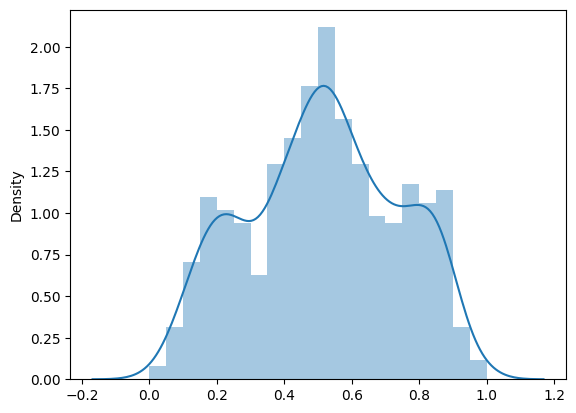

In [74]:
fig = plt.figure()
sns.distplot((y_train, y_train_cnt), bins=20)

In [75]:
df_test[var] = scaler.transform(df_test[var])

In [76]:
y_test = df_test['cnt']
x_test = df_test.drop(["casual", "registered"], axis=1)
x_test = x_test.astype(float)

In [77]:
x_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0.0,1.0,0.0,0.831783,0.657364,0.084219,0.692706,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
535,1.0,0.0,1.0,0.901354,0.610133,0.153728,0.712034,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
299,0.0,0.0,0.0,0.511964,0.837699,0.334206,0.303382,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
221,0.0,0.0,1.0,0.881625,0.437098,0.339570,0.547400,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,0.0,0.0,0.0,0.817246,0.314298,0.537414,0.569029,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
c = x_train_rfe2.drop('const', axis=1, errors='ignore')

In [79]:
col2 = c.columns

In [80]:
x_test_rfe2 = x_test[col2]

In [81]:
x_test_rfe2 = sm.add_constant(x_test_rfe2, has_constant='add')

In [82]:
x_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    float64
 2   windspeed     219 non-null    float64
 3   cnt           219 non-null    float64
 4   mnth_Jul      219 non-null    float64
 5   mnth_Sep      219 non-null    float64
 6   weekday_Mon   219 non-null    float64
 7   weekday_Sun   219 non-null    float64
 8   weathersit_C  219 non-null    float64
dtypes: float64(9)
memory usage: 17.1 KB


In [83]:

# Ensure test set has the same columns as training set used for lm2
x_test_rfe2 = x_test_rfe2[lm2.model.exog_names]
# Add constant to test set
x_test_rfe2 = sm.add_constant(x_test_rfe2, has_constant='add')

# Align test features with training features
x_test_rfe2 = x_test_rfe2[lm2.model.exog_names]

# Predict
y_pred = lm2.predict(x_test_rfe2)


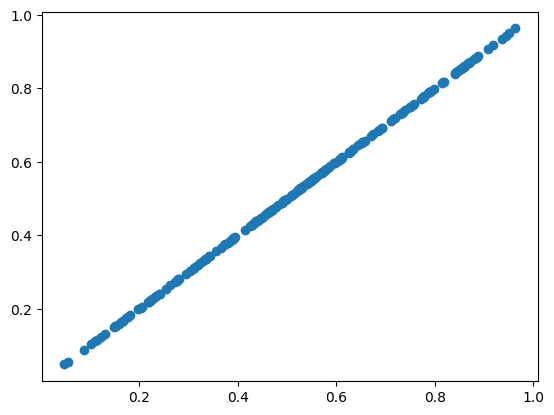

In [84]:
plt.figure()
plt.scatter(y_test, y_pred)

In [85]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1.0

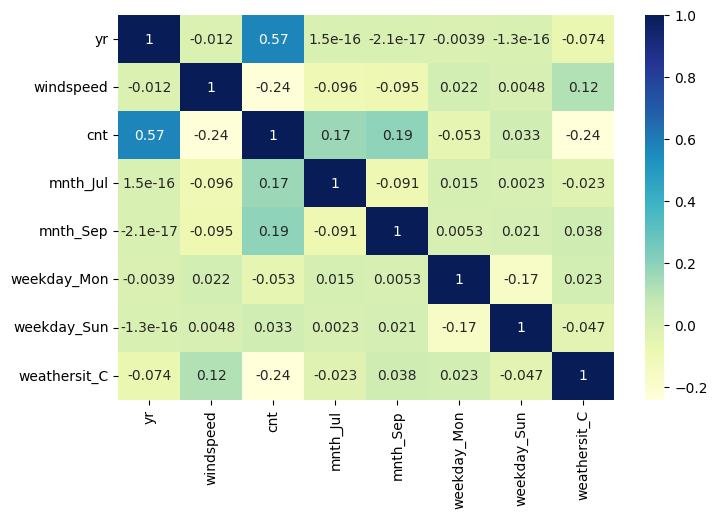

In [86]:
plt.figure(figsize=(8,5))

sns.heatmap(dataset[col2].corr(), cmap='YlGnBu', annot=True )
plt.show()